In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)

In [6]:
data = pd.read_csv("survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data.shape


(1259, 27)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
data.describe()

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


In [10]:
data[data['Age']<18]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [11]:
data[data['Age']>75]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


In [12]:
#we can address this issue similarly to how we handle missing values, by replacing them with the mean or median according to the data.
data.shape[0]-data.count()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [14]:
#Percentage of missing values.
100*((data.shape[0]-data.count())/data.shape[0])

Timestamp                    0.00
Age                          0.00
Gender                       0.00
Country                      0.00
state                       40.91
self_employed                1.43
family_history               0.00
treatment                    0.00
work_interfere              20.97
no_employees                 0.00
remote_work                  0.00
tech_company                 0.00
benefits                     0.00
care_options                 0.00
wellness_program             0.00
seek_help                    0.00
anonymity                    0.00
leave                        0.00
mental_health_consequence    0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
mental_health_interview      0.00
phys_health_interview        0.00
mental_vs_physical           0.00
obs_consequence              0.00
comments                    86.97
dtype: float64

In [29]:
data_missing = pd.DataFrame(index = data.columns.values)

In [30]:
data_missing['Null'] = data.isnull().sum().values
data_missing

,Null
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [31]:
data['Country'].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [32]:
data[data['Country'] == 'United States']['state'].value_counts().head()

state
CA    138
WA     70
NY     56
TN     45
TX     44
Name: count, dtype: int64

In [34]:
data[data['Country'] != 'United States']

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2015-05-05 15:16:25,32,female,United Kingdom,NaN,No,No,No,NaN,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN
1245,2015-05-06 10:14:50,22,Male,Australia,NaN,No,Yes,Yes,Often,100-500,...,Don't know,Maybe,Maybe,No,Yes,No,Maybe,Don't know,Yes,In australia all organisations of a certain si...
1247,2015-05-07 10:08:50,36,male,Finland,NaN,No,No,Yes,Often,6-25,...,Very difficult,Yes,No,Some of them,No,No,Maybe,Don't know,Yes,NaN
1251,2015-08-17 09:38:35,36,Male,South Africa,NaN,No,Yes,Yes,Often,100-500,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN


In [15]:
##Percentage of data outside of the United States
100 * (data[data['Country'] != 'United States'].shape[0] / data.shape[0])

40.3494837172359

In [36]:
data['self_employed'].value_counts()


self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [16]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [17]:
data['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

**Data Pre Processing**

In [19]:
#Performing the above mentioned corrections for the Missing values
data['self_employed'].mode()[0]

'No'

In [20]:
data['self_employed'] = data['self_employed'].replace(np.nan, data['self_employed'].mode()[0])
data['work_interfere'] = data['work_interfere'].replace(np.nan, data['work_interfere'].mode()[0])

data.drop(['state','comments'], axis=1, inplace = True)


In [24]:
#Lets verify the integrity of missing values again.
100*((data.shape[0]-data.count())/data.shape[0])

Timestamp                   0.00
Age                         0.00
Gender                      0.00
Country                     0.00
self_employed               0.00
family_history              0.00
treatment                   0.00
work_interfere              0.00
no_employees                0.00
remote_work                 0.00
tech_company                0.00
benefits                    0.00
care_options                0.00
wellness_program            0.00
seek_help                   0.00
anonymity                   0.00
leave                       0.00
mental_health_consequence   0.00
phys_health_consequence     0.00
coworkers                   0.00
supervisor                  0.00
mental_health_interview     0.00
phys_health_interview       0.00
mental_vs_physical          0.00
obs_consequence             0.00
dtype: float64

In [25]:
#Lets check for any duplicated values
data.duplicated().any()

False

In [26]:
#We need to address the concerns present in the Age & Gender fields.
#unique values in the Gender field

print('Unique Genders present in the data :', data['Gender'].nunique())
print('Unique Genders present in the data :', set(data['Gender']))


Unique Genders present in the data : 49
Unique Genders present in the data : {'Agender', 'queer', 'cis male', 'p', 'Genderqueer', 'male', 'Man', 'Neuter', 'Male', 'Female', 'Trans woman', 'Male ', 'Nah', 'Cis Male', 'All', 'non-binary', 'Female ', 'male leaning androgynous', 'f', 'Mail', 'Make', 'Cis Man', 'maile', 'cis-female/femme', 'M', 'm', 'ostensibly male, unsure what that really means', 'Malr', 'Female (trans)', 'F', 'fluid', 'something kinda male?', 'Woman', 'Mal', 'femail', 'female', 'Male (CIS)', 'Male-ish', 'woman', 'Cis Female', 'Androgyne', 'msle', 'Guy (-ish) ^_^', 'Trans-female', 'queer/she/they', 'A little about you', 'Female (cis)', 'Femake', 'Enby'}


In [27]:
data['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [28]:
unique_gender = data['Gender'].str.lower().unique()

# Stratas of Gender category
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make",
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male",
            "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they",
             "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer",
             "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ",
              "cis-female/femme", "female (cis)", "femail"]

# Iterate over rows and replace the inconsistent data with right data
for (row, col) in data.iterrows():
    if str.lower(col['Gender']) in male_str:
        data['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)

    if str.lower(col['Gender']) in female_str:
        data['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)

    if str.lower(col['Gender']) in trans_str:
        data['Gender'].replace(to_replace=col['Gender'], value='trans', inplace=True)

# Remove rest of the unnecessary text
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

# Display the unique value of Gender feature
print(data['Gender'].unique())

['female' 'male' 'trans']


**Exploratory Data Analysis**

In [29]:
#Lets try to plot Age vs Treatment
data['treatment'].value_counts()

treatment
Yes    635
No     622
Name: count, dtype: int64

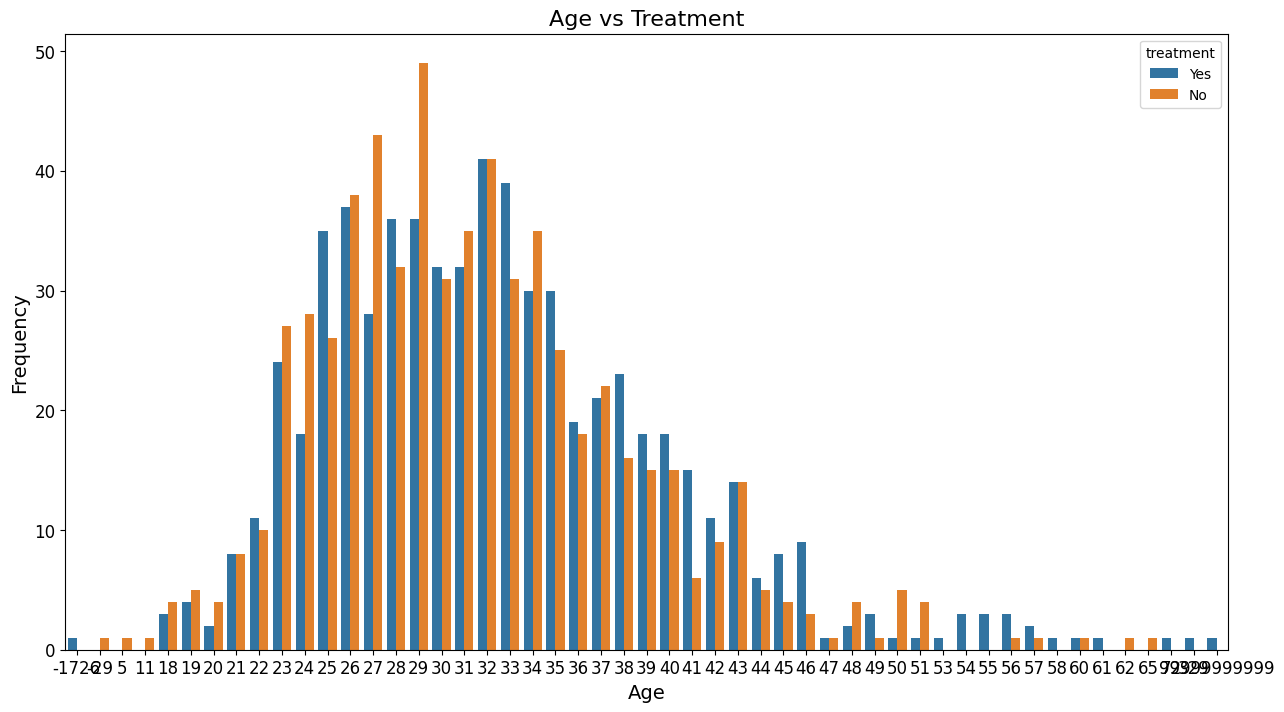

In [45]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='treatment', data=data)

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.grid(b=True)

plt.show()


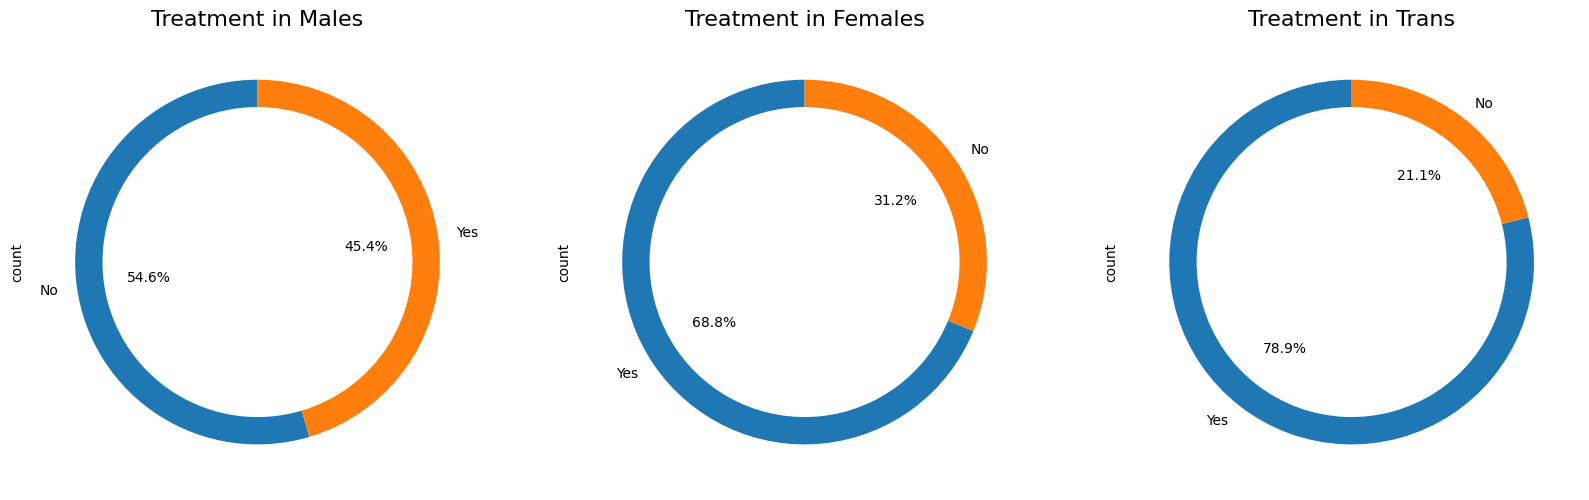

In [50]:
#assosciation between Gender & Treatment ?
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
data['treatment'][data['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
data['treatment'][data['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
data['treatment'][data['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

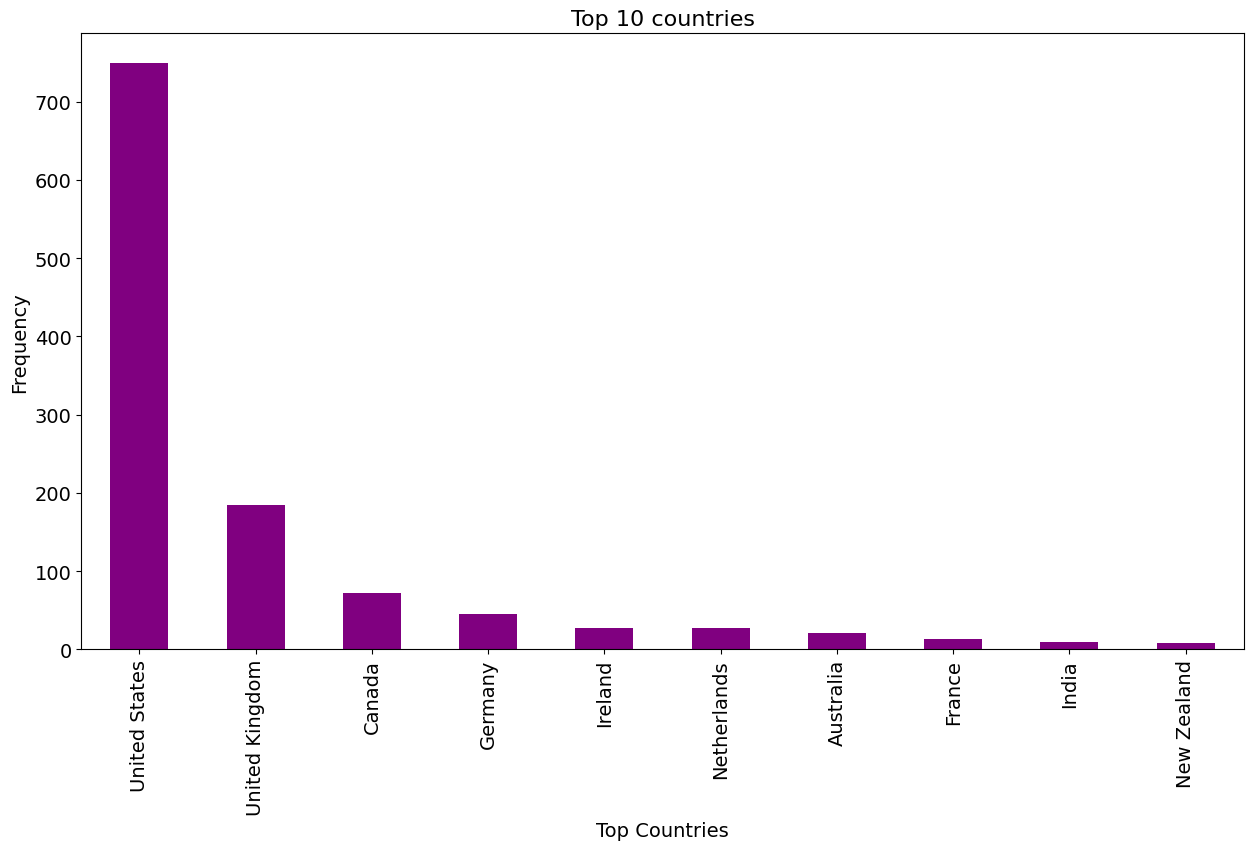

In [55]:
#Top 10 Countries recorded for mental health treatment?
fig = plt.figure(figsize=[15,8])

data['Country'].value_counts().head(10).plot.bar(color='purple')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries', size=16)

plt.show()

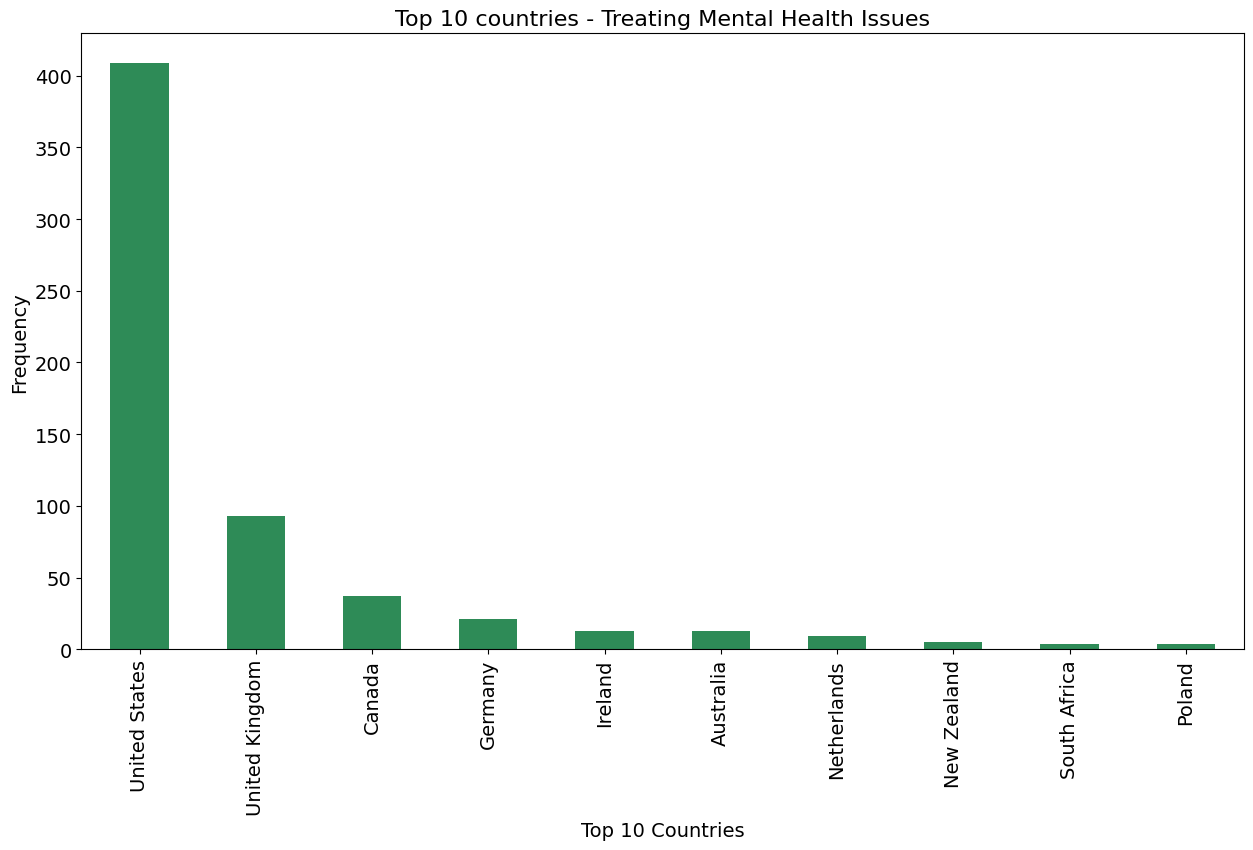

In [56]:
#countries are actually contributing more for mental health treatment
fig = plt.figure(figsize=[15,8])

data[data['treatment']== 'Yes']['Country'].value_counts().head(10).plot.bar(color='seagreen')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Treating Mental Health Issues', size=16)

plt.show()

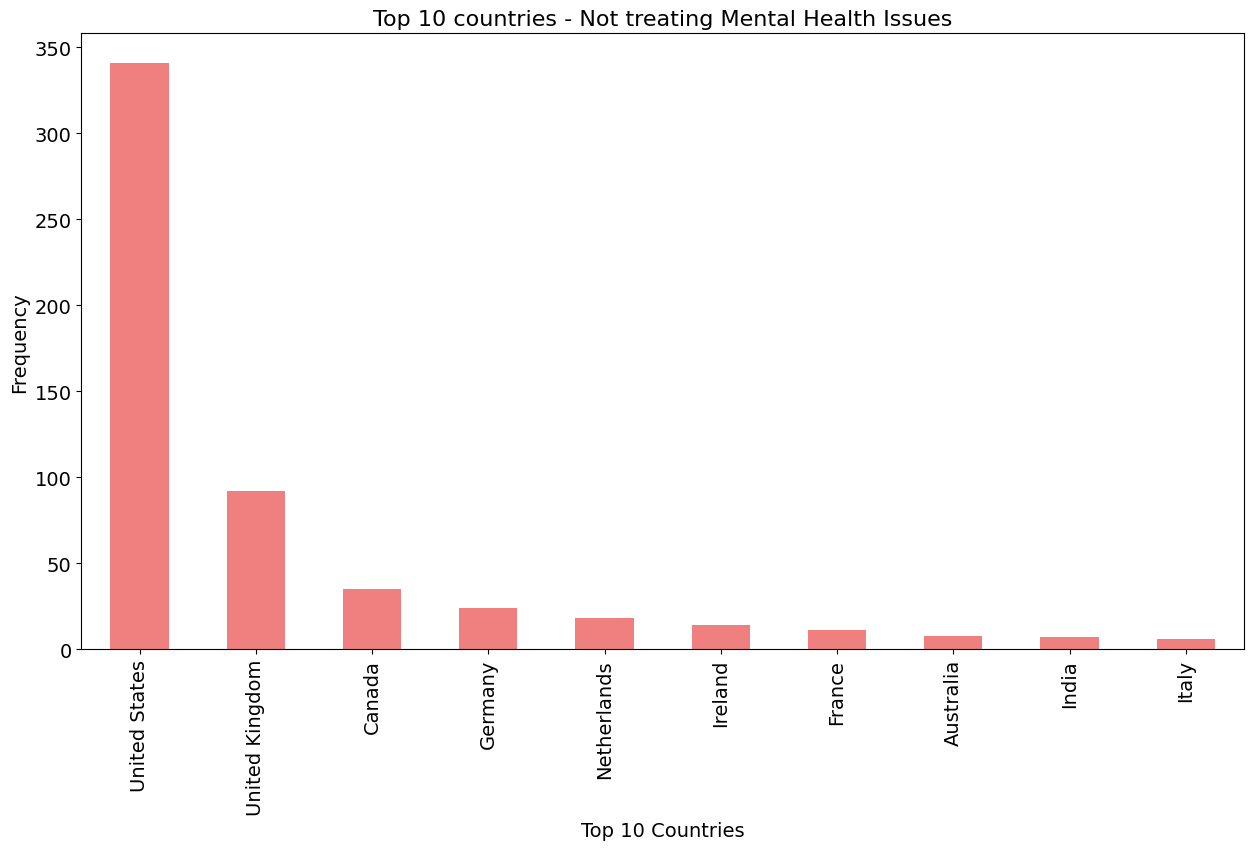

In [57]:
fig = plt.figure(figsize=[15,8])

data[data['treatment']== 'No']['Country'].value_counts().head(10).plot.bar(color='lightcoral')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top 10 Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries - Not treating Mental Health Issues', size=16)

plt.show()